In [1]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the XLSX file
file_path = 'twitter-elon-tesla-data.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataframe
print(df['post'][9])

@bevedoni Look at all the people watching behind the glass! 💥
Pretty exciting! 🥳🚀  go Tesla!


In [4]:
print(df.columns)

Index(['User', 'Username', 'UTC Date', 'post', 'Binders', 'Permalink',
       'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value'],
      dtype='object')


In [5]:
print(df.head())

                   User         Username            UTC Date  \
0                  aHoy   @BrandonLeong3 2023-04-01 23:59:53   
1              victoria       @starveiRL 2023-04-01 23:59:46   
2          Frances Caso    @frances_caso 2023-04-01 23:59:44   
3  DavidRowe ⧖ - #WATON    @DavidRoweWTL 2023-04-01 23:59:43   
4  The Green Living Guy  @greenlivingguy 2023-04-01 23:59:37   

                                                post  Binders  \
0  @Chrysto @elonmusk @Tesla Your burning passion...      NaN   
1  i deleted that tweet cs i think an elon musk f...      NaN   
2  @elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...      NaN   
3  @GerberKawasaki @garyblack00 @farzyness @Tesla...      NaN   
4  CNBC Reports Tesla Installs Over 3,000 Solar R...      NaN   

                                           Permalink  reposts  Likes count  \
0  https://www.twitter.com/user/status/1642315880...        0            0   
1  https://www.twitter.com/user/status/1642315850...        0       

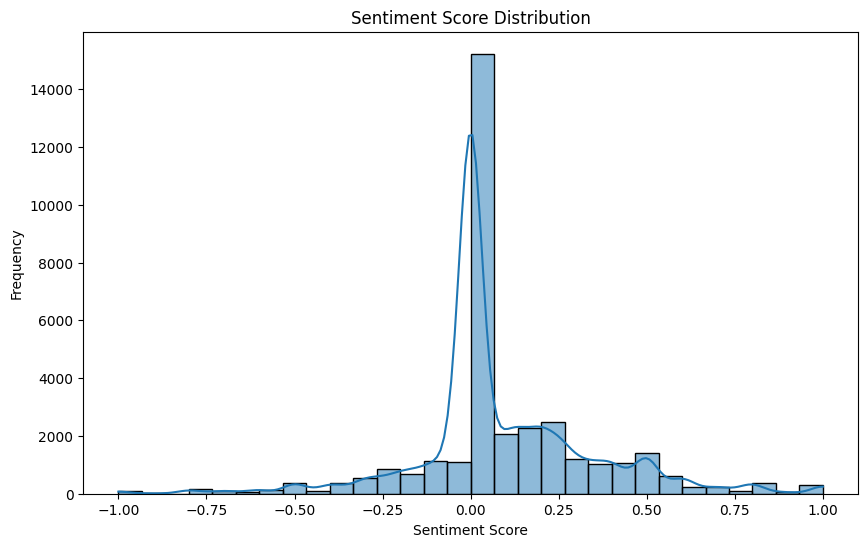

In [6]:
# Calculate sentiment score
def calculate_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_score'] = df['post'].apply(calculate_sentiment)

# Data Visualization
# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot average sentiment score by day (assuming there's a 'date' column)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.date
    daily_sentiment = df.groupby('day')['sentiment_score'].mean().reset_index()

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=daily_sentiment, x='day', y='sentiment_score')
    plt.title('Average Sentiment Score by Day')
    plt.xlabel('Day')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# Calculate sentiment score
def calculate_sentiment(text, impressions, likes):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    # Adjust sentiment score based on impressions and likes
    adjusted_score = sentiment_score * (1 + (likes / (impressions + 1)))
    return adjusted_score

# Assuming df is your DataFrame and it has 'post', 'impressions', and 'likes' columns
df['sentiment_score'] = df.apply(lambda row: calculate_sentiment(row['post'], row['Impressions'], row['Likes count']), axis=1)

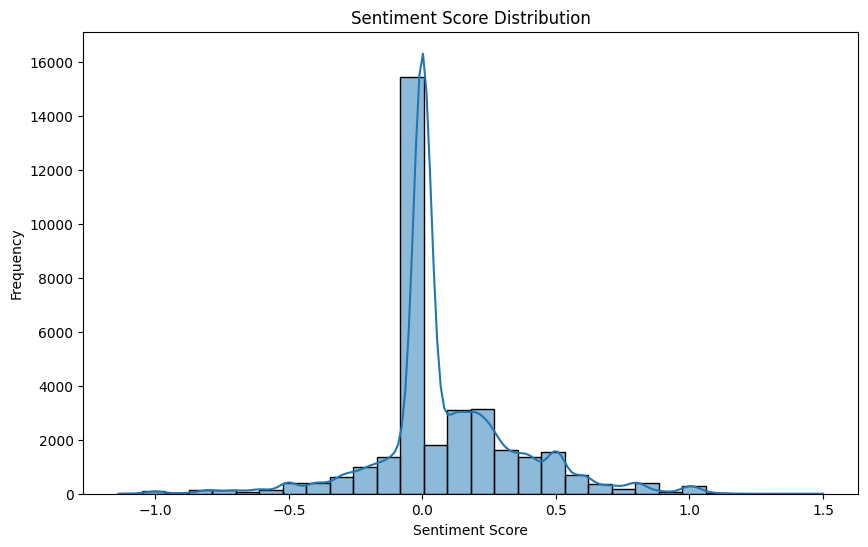

In [15]:
# Data Visualization
# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

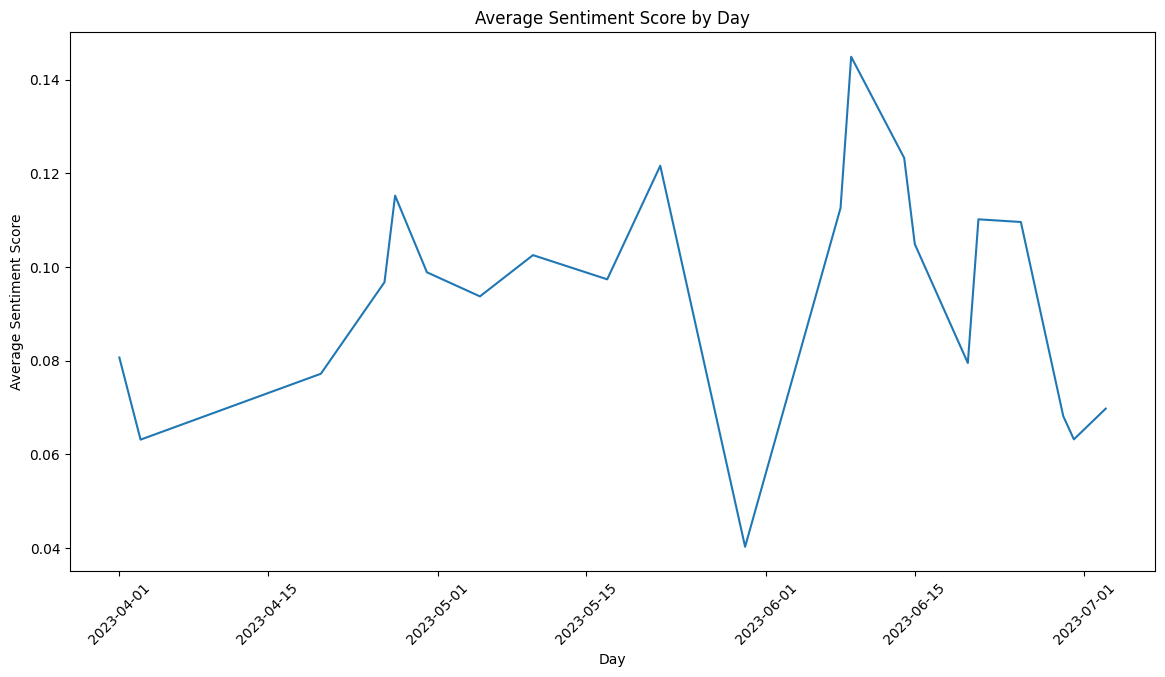

In [19]:
# Convert 'UTC Date' to datetime if it's not already
df['UTC Date'] = pd.to_datetime(df['UTC Date'])

# Group by 'UTC Date' and calculate the mean sentiment score for each day
daily_sentiment = df.groupby(df['UTC Date'].dt.date)['sentiment_score'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment, x='UTC Date', y='sentiment_score')
plt.title('Average Sentiment Score by Day')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()